# Aplicación logística y diagramas de bifurcación

En este ejercicio usaremos la aplicación logística $$x_{n+1}=rx_n(1-x_n)$$ con $x_0 \in [0,1]$ y $r \in [0,4]$ para entender el significado de los diagramas de bifurcación. Posteriormente usaremos el mismo procedimiento para mostrar que otras funciones de la forma $$x_{n+1} = f(x_n)$$ donde $f(x)$ es una función definida por un parámetro $r$ también generan diagramas de bifurcación.

---

Para comprender el significado de los diagramas de bifurcación comenzaremos por graficar los primeros valores de $x_{n+1}=rx_n(1-x_n)$ para observar el comportamiento de esta regla iterativa. Graficamos los valores para $x_0 = 0.01$ y $x_0=0.95$ a manera de mostrar el efecto de las condiciones iniciales en el resultado final. Se grafica la regla iterativa para 9 valores de $r$, repartidos en todo el intervalo $[0,4]$.

In [3]:
import matplotlib.pyplot as plt

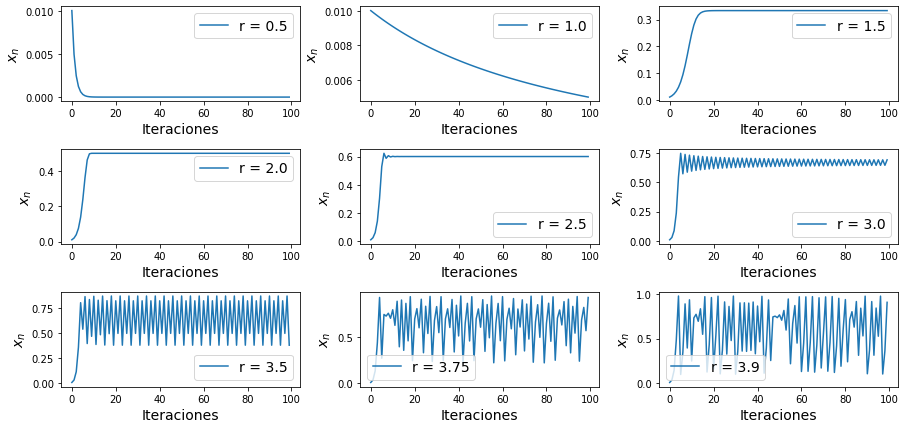

In [11]:
rs=[0.5*i for i in range(1,8)]  #Valores de r
rs.extend([3.75, 3.9])  #Agregamos un par de valores extra cerca de 4 donde ocurre el comportamiento más caótico.
n=100   #Graficamos 100 puntos para cada r.
x0=0.01   #Valor inicial de xn

fig=plt.figure(figsize=(15,7))
ordenadas=range(n)
for j, r in enumerate(rs):
    xns=[x0]
    for i in range(n-1):
        xns.append(r*xns[i]*(1-xns[i]))
    plt.subplot(int('33'+str(j+1)))
    plt.plot(ordenadas, xns, label=f'r = {r}')
    plt.xlabel('Iteraciones', fontsize=14)
    plt.ylabel('$x_n$', fontsize=14)
    plt.legend(fontsize=14)

plt.subplots_adjust(hspace=0.5, wspace=0.25)
#plt.show()
plt.savefig(f'x0{x0}.png')

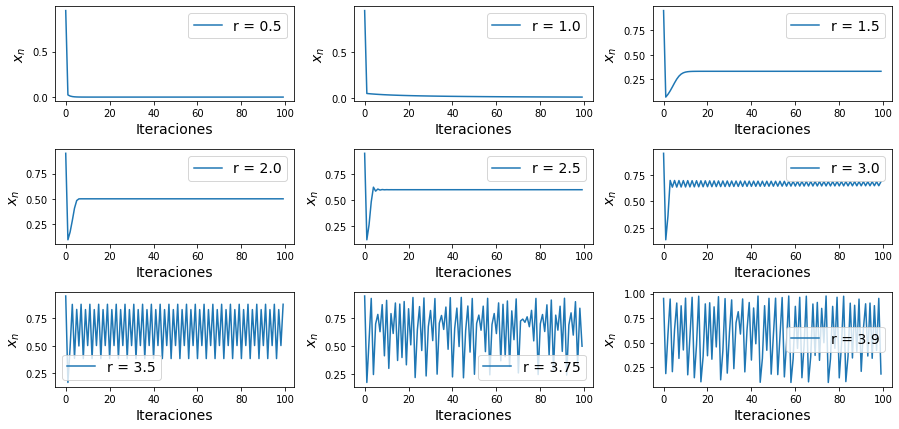

In [12]:
x0=0.95   #Valor inicial de xn

fig=plt.figure(figsize=(15,7))
ordenadas=range(n)
for j, r in enumerate(rs):
    xns=[x0]
    for i in range(n-1):
        xns.append(r*xns[i]*(1-xns[i]))
    plt.subplot(int('33'+str(j+1)))
    plt.plot(ordenadas, xns, label=f'r = {r}')
    plt.xlabel('Iteraciones', fontsize=14)
    plt.ylabel('$x_n$', fontsize=14)
    plt.legend(fontsize=14)

plt.subplots_adjust(hspace=0.5, wspace=0.25)
#plt.show()
plt.savefig(f'x0{x0}.png')

Se observa que para $r<3$ el valor de $x_n$, independientemente del valor inicial $x_0$, tiene una tendencia a converger a un valor fijo. Por otro lado para valores mayores a 3, el valor de $x_n$ comienza a oscilar en algunos casos de manera periodica, en otros casos de manera caótica.

---

### Convergencia de la sucesión.

Aquí podemos hacernos la pregunta, ¿hacia que valor o valores converge la sucesión en función del valor de $r$?. Esta pregunta la podemos responder si nos permitimos calcular una gran cantidad de términos (en nuestro caso calcularemos 1000) y tomamos los últimos términos de la sucesión (usaremos los últimos 50 términos) para ver entre que valor o valores oscila la sucesión.

Para visualizarlo, vamos a guardar los últimos 50 puntos de la sucesión y los vamos a graficar en función de su parámetro $r$.

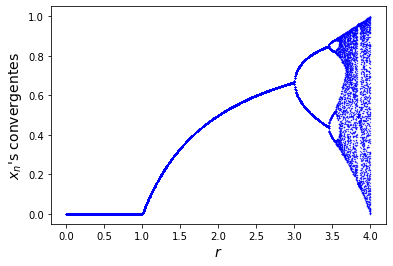

In [13]:
x0=0.01  #Población inicial
n=1000  #Numero total de iteraciones
ultimos=50   #Términos que consideraremos para checar hacia donde converge la sucesión.

r=0
fig=plt.figure()
while r<4: 
    xns=[x0]   #Lista donde se guardan los elementos de la sucesión.
    for i in range(n):
        xns.append(r*xns[i]*(1-xns[i]))
    r+=0.005
    xfinales=xns[n-ultimos:]    #Los ultimos 50 valores de la sucesión.
    rs=[r for xs in xfinales]    #Una lista con el valor de r actual repetido 50 veces.
    plt.scatter(rs, xfinales, c='b', marker='o', s=0.1)
    
plt.xlabel('$r$', fontsize=14)
plt.ylabel('$x_n$\'s convergentes', fontsize=14)
#plt.show()
plt.savefig('logisticaOriginal.png')

La gráfica resultante es lo que se conoce tradicionalmente como el diagrama de bifurcación de la aplicación logística.

---

### Generalización para $x_{n+1} = f(x_n)$

Para obtener los diagramas de bifurcación con mayor libertad, vamos a definir una clase que acepte una función como argumento. De este modo podremos invocar a la clase y obtener toda la funcionalidad necesaria para obtener los diagramas de bifurcación de $f(x)$ sin tener que reescribir el código para cada función. Esto lo hacemos con el siguiente código que poseé metodos que nos permiten calcular todo aquello que deseemos para generar el diagrama, incluyendo graficar su diagrama de bifurcación.

In [3]:
class secuenciaLogistica:
    """
    Modela el sistema dinámico descrito de la forma: x_{n+1} = f(r, x_n)
    """
    def __init__(self, fx):
        """
        Inicializa con x y r = 0 para una función fx arbitraria
        """
        self.x, self.r, self.fx = 0, 0, fx
    
    def actualizar(self):
        """
        Aplica el mapa de acuerdo a la función fx para obtener el siguiente termino de la iteración.
        Se asume que fx es una función de 2 argumentos: r y x.
        """
        self.x = self.fx(self.r, self.x)
    
    def generarSecuencia(self, n):
        "Genera y retorna una secuencia de longitud n para la función fx"
        xns=[]
        for i in range(n):
            xns.append(self.x)
            self.actualizar()
        return xns
    
    def diagBifurcacion(self, inicio, fin, paso, x0, n, ultimos, titulo='', aspecto=(10,7)):
        """
        Genera el diagrama de bifurcación de la función f(x) en el intervalo de r dado por [inicio, fin] 
        con pasos en r dados por `paso` usando una sucesión de `n` elementos. Luego toma los 
        `ultimos` elementos de la sucesión para incluirlos en la gráfica.
        Asigna un `titulo` a la gráfica si se le provee y emplea una relacion de aspecto `aspecto` si se
        le proveé.
        """
        import matplotlib.pyplot as plt
        self.r=inicio
        fig=plt.figure(figsize=aspecto)
        while self.r<fin:
            self.x=x0
            xns=self.generarSecuencia(n)
            self.r+=paso
            xfinales=xns[n-ultimos:]
            rs=[self.r for xs in xfinales]     
            plt.scatter(rs, xfinales, c='b', marker='o', s=0.1)
        plt.title(titulo, fontsize=24)
        plt.xlabel('$r$', fontsize=24)
        plt.ylabel('$x_n$\'s convergentes', fontsize=24)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        #plt.show()
        plt.savefig('diagramaBifurcacion.png')

Probando la clase con la sucesión original recuperamos nuestro resultado anterior en solo tres líneas.

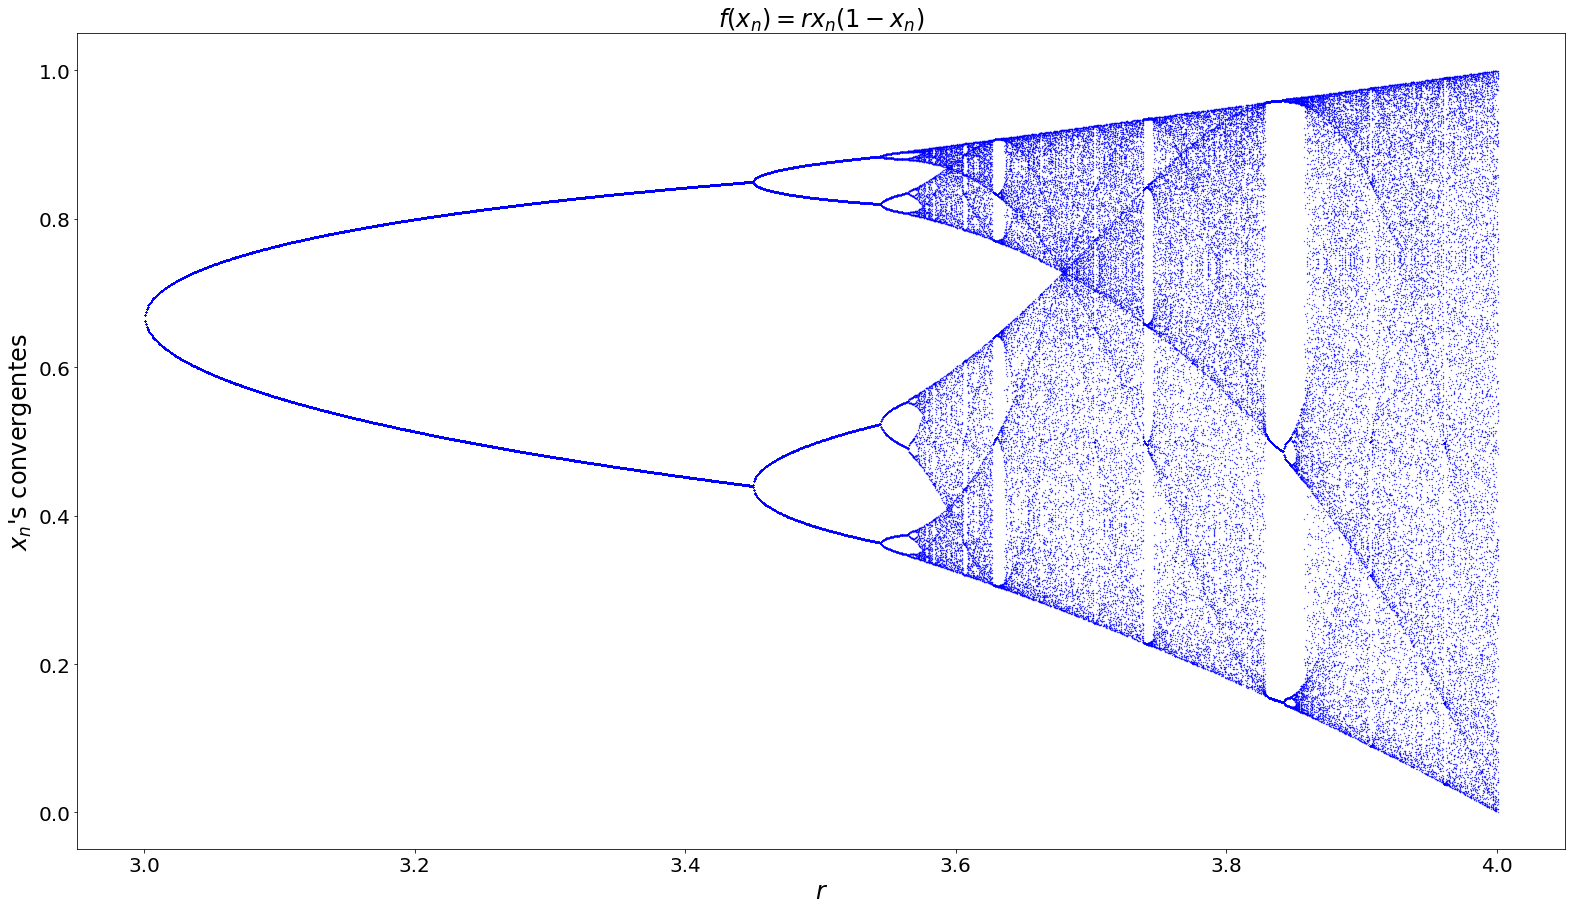

In [8]:
aplLogistica = lambda r, x: r*x*(1-x)   #Define una funcion empleando la aplicacion logistica
secOriginal=secuenciaLogistica(aplLogistica)   #Inicializamos una instancia de la clase con la función fx deseada.
secOriginal.diagBifurcacion(3,4,0.000625,0.5,3000,100,titulo='$f(x_n)=rx_n(1-x_n)$',aspecto=(26.67,15))   #Llamamos al método que grafica el diagrama de bifurcación.

---

Probando la clase con la regla de sucesión del fractal de Mandelbrot $$z_{n+1}=z_n^2+c$$ obtenemos:

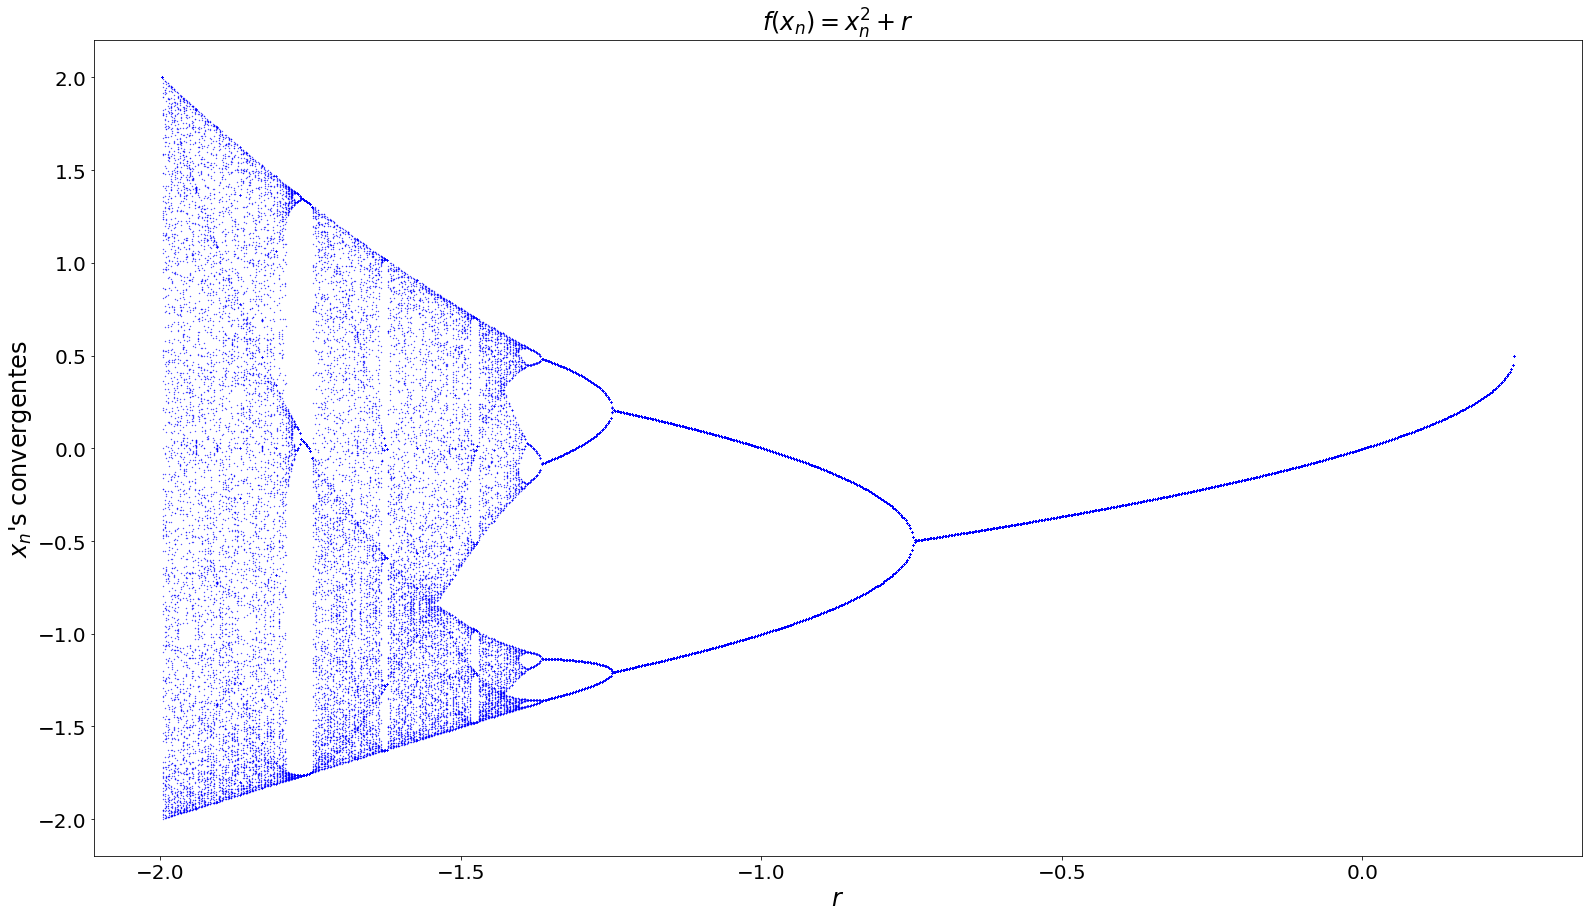

In [13]:
reglaMandelbrot = lambda c,z: z**2+c    #Función con la regla de sucesión del fractal de Mandelbrot
secMandelbrot=secuenciaLogistica(reglaMandelbrot)
secMandelbrot.diagBifurcacion(-2,1/4,0.0025,0,1000,100,titulo='$f(x_n)=x_n^2+r$',aspecto=(26.67,15)) 

---

Probando para la función: $$x_{n+1}=rx_n(1-tanh(x_n))$$ obtenemos:

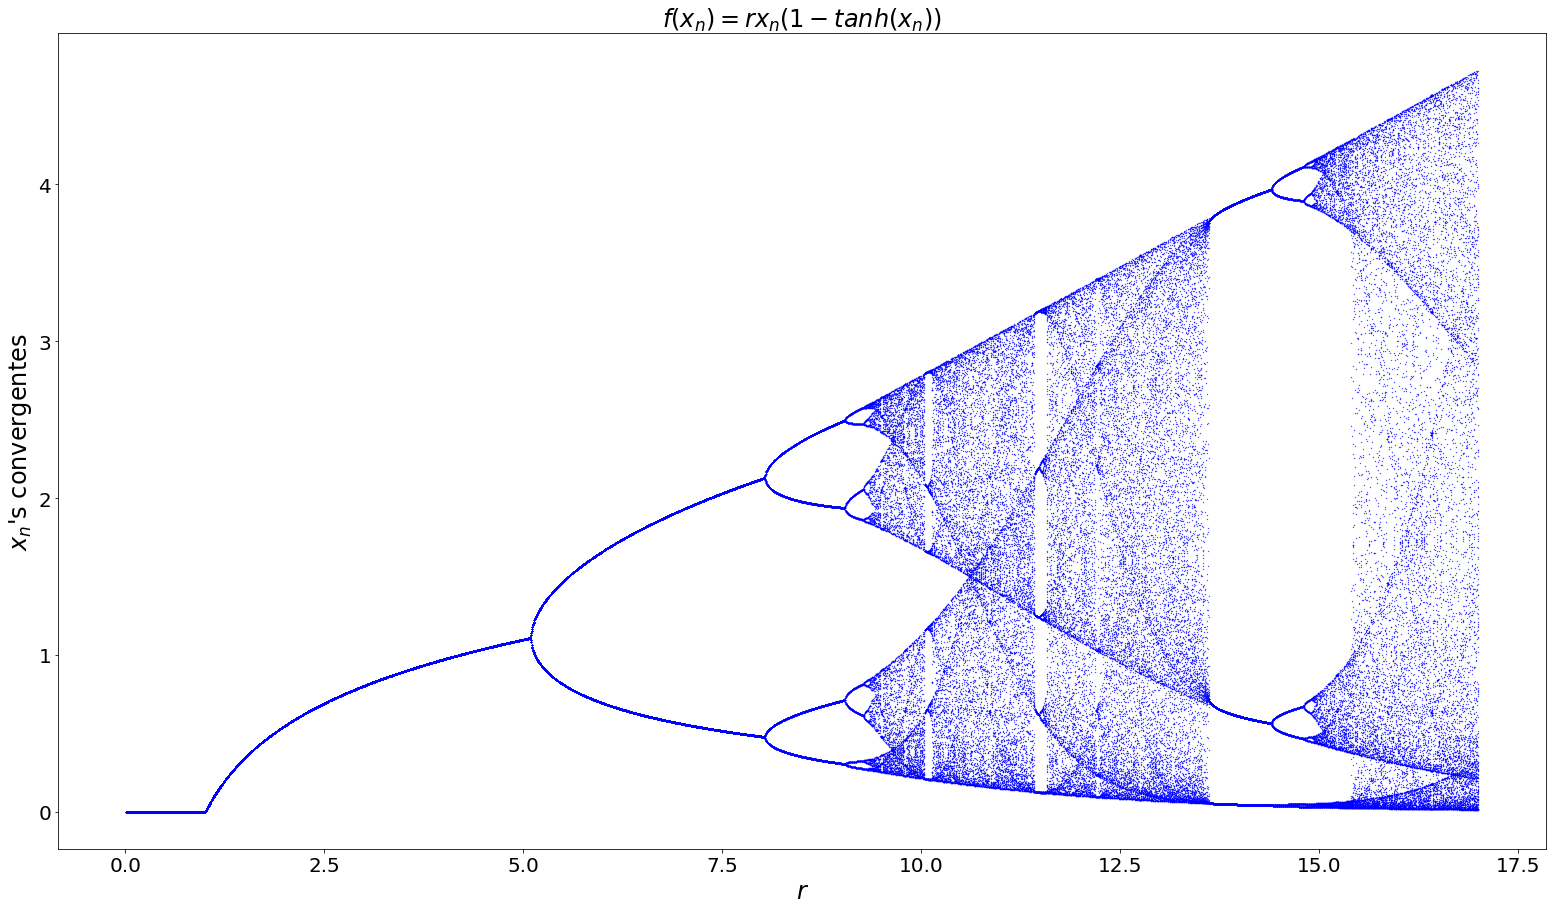

In [14]:
from numpy import tanh
reglaTanh = lambda r,x: r*x*(1-tanh(x)) 
secTanh=secuenciaLogistica(reglaTanh)
secTanh.diagBifurcacion(0,17,0.005,0.01,1000,50,titulo='$f(x_n)=rx_n(1-tanh(x_n))$',aspecto=(26.67,15))

---

Probando para la función $$f(x_n)=sin(rx_n)$$ obtenemos:

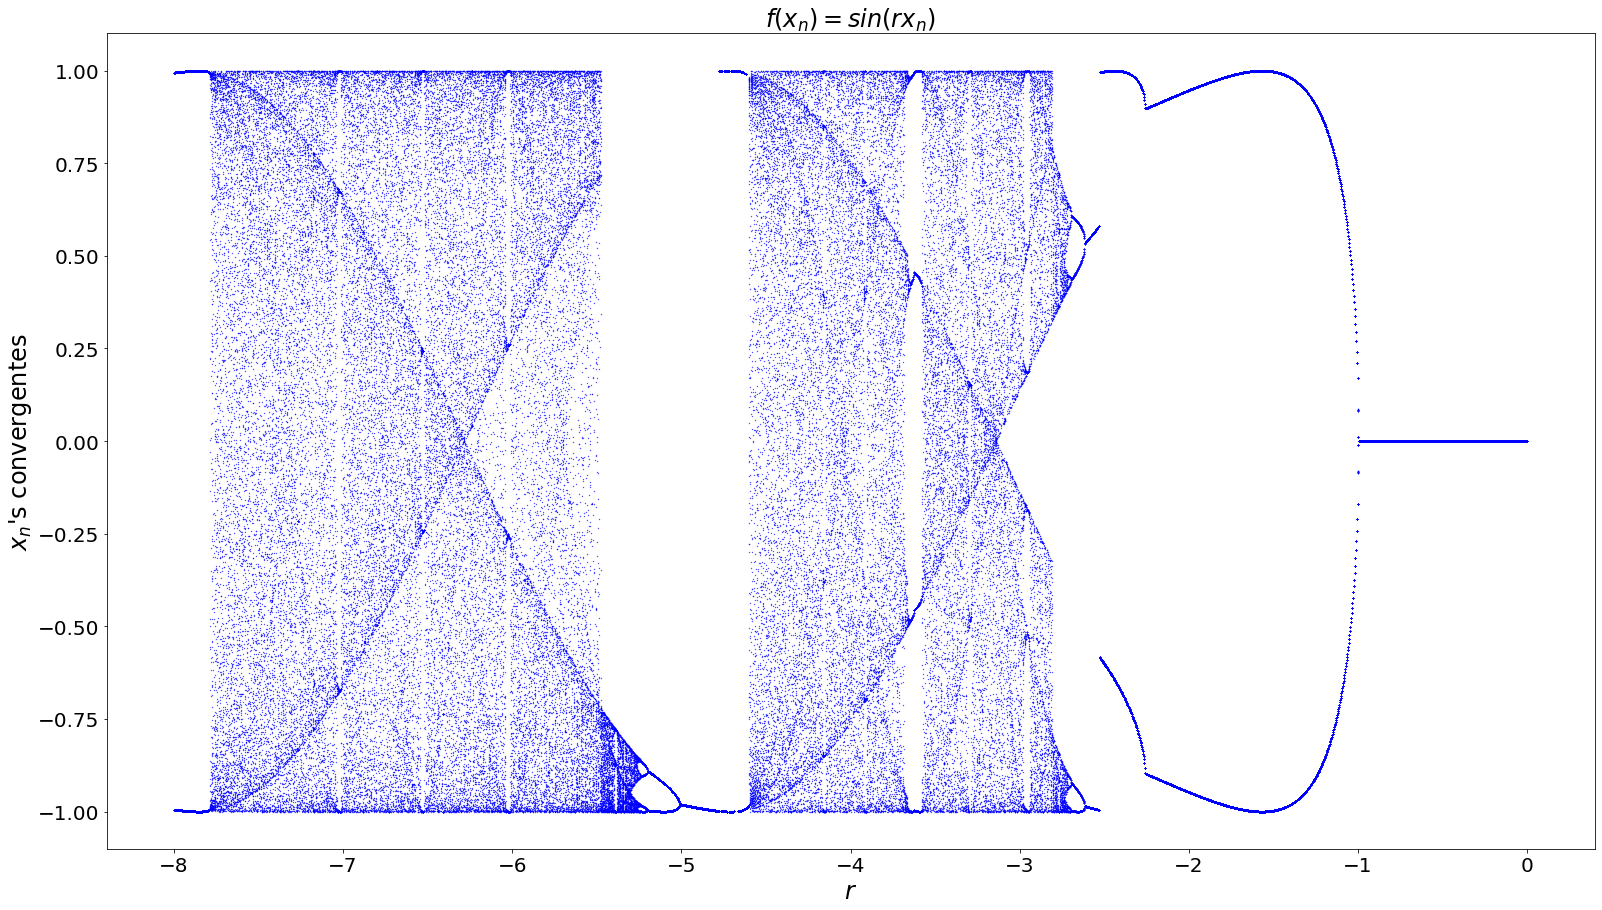

In [15]:
from numpy import sin
reglaSin = lambda r,x: sin(r*x) 
secSin=secuenciaLogistica(reglaSin)
secSin.diagBifurcacion(-8,0,0.0025,0.01,1000,50,titulo='$f(x_n)=sin(rx_n)$',aspecto=(26.67,15))

Adviértase que ahora que la instancia de la clase está definida, podemos invocar sus métodos con nuevos parámetros de manera muy simple.

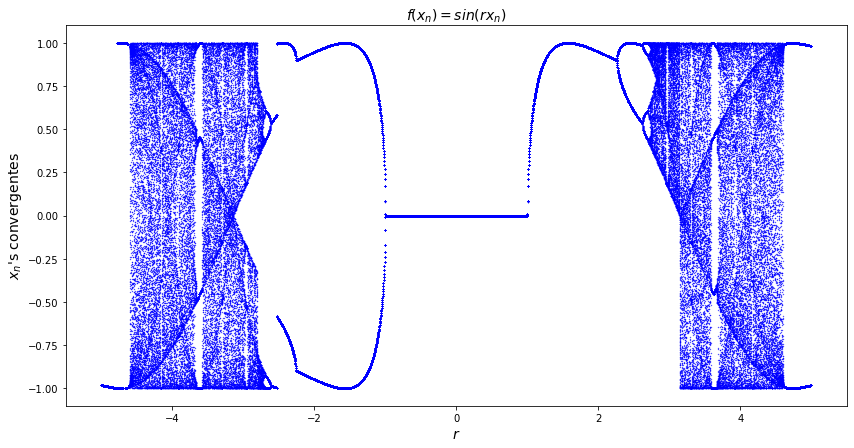

In [21]:
secSin.diagBifurcacion(-5,5,0.0025,0.01,1000,50,titulo='$f(x_n)=sin(rx_n)$',aspecto=(14,7))

---

Con esto queda claro que múltiples sucesiones del tipo $x_{n+1}=f(x_n)$ dan origen a diagramas de bifurcación. Cada función genera patrónes que le son específicos, pero la tendencia de las sucesiones a converger o a presentar ramificaciones ante valores específicos de $r$ están presente en todos los diagramas.

---

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
aplLogistica = lambda r, x: r*x*(1-x)   #Define una funcion empleando la aplicacion logistica
secOriginal=secuenciaLogistica(aplLogistica)   #Inicializamos una instancia de la clase con la función fx deseada.

In [5]:
def grafSecuencia(Poblacion,r,Iteraciones):
    secOriginal.x=Poblacion
    secOriginal.r=r
    fig=plt.figure(figsize=(26.67,15))
    secuencia=secOriginal.generarSecuencia(Iteraciones)
    plt.plot(range(Iteraciones),secuencia,label=f'$x_n = {secuencia[Iteraciones-1]:.3}$',marker='o',color='tab:blue')
    plt.title('$x_{n+1}=rx_n(1-x_n)$', fontsize=24)
    plt.xlabel('$n$', fontsize=24)
    plt.ylabel('$x_n$', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim(0, 1)
    plt.legend(loc='upper right', fontsize=20)
    plt.savefig('iteraciones.png')

widgets.interactive(grafSecuencia, Poblacion=(0.01,1,0.05),r=(0,4,0.05),Iteraciones=(10,1000,10))

interactive(children=(FloatSlider(value=0.46, description='Poblacion', max=1.0, min=0.01, step=0.05), FloatSli…

In [6]:
diagrama=secOriginal.diagBifurcacion
def grafico(fin=(0.01,4,0.1)):
    diagrama(0, fin, 0.05, 0.01, 1000, 50)
    
widgets.interactive(grafico, fin=(0,4,0.1))

interactive(children=(FloatSlider(value=2.0, description='fin', max=4.0), Output()), _dom_classes=('widget-int…